In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def update_snfs(cells, v, v_max, p, q, r):
    n = len(cells)
    car_pos = np.where(cells == 1)[0]
    car_pos.sort()
    num_cars = len(car_pos)

    dist = np.zeros(n, dtype=int)
    for k in range(num_cars):
        cur = car_pos[k]
        nxt = car_pos[(k + 1) % num_cars]
        gap = (nxt - cur - 1) % n
        dist[cur] = gap

    v_new = np.minimum(v + 1, v_max)

    v_new = np.minimum(v_new, dist)

    random_vals = np.random.rand(n)
    slow_mask = (cells == 1) & (random_vals < p) & (v_new > 0)
    v_new[slow_mask] -= 1

    if q > 0:
        q_mask = (cells == 1) & (dist > v_new) & (v_new > 0) & (np.random.rand(n) < q)
        v_new[q_mask] -= 1

    if r > 0:
        r_mask = (cells == 1) & (dist <= v_new) & (v_new < v_max) & (np.random.rand(n) < r)
        v_new[r_mask] += 1

    next_cells = np.zeros_like(cells)
    next_v = np.zeros_like(v)

    for cur in car_pos:
        move = v_new[cur]
        new_pos = (cur + move) % n
        if next_cells[new_pos] == 0:
            next_cells[new_pos] = 1
            next_v[new_pos] = v_new[cur]
        else:
            next_cells[cur] = 1
            next_v[cur] = 0

    return next_cells, next_v

In [16]:
def simulate_snfs_fundamental_diagram(v_max=3, q=0, r=0, uniform_init=False):
    N_cell = 100
    T_equil = 50
    T_sim = 50
    p = 0.1

    num_points = 250
    densities = np.random.rand(num_points) * 0.9 + 0.05
    densities.sort()

    flows = []

    for rho in densities:
        N_cars = int(rho * N_cell)
        cells = np.zeros(N_cell, dtype=int)

        if uniform_init and v_max == 1:
            spacing = N_cell // N_cars if N_cars > 0 else N_cell
            car_indices = np.array([i * spacing for i in range(N_cars)]) % N_cell
            cells[car_indices] = 1
        else:
            car_indices = np.random.choice(N_cell, N_cars, replace=False)
            cells[car_indices] = 1

        v = np.random.randint(0, v_max + 1, size=N_cell)
        v[cells == 0] = 0

        speeds = []
        for t in range(T_equil):
            cells, v = update_snfs(cells, v, v_max, p, q, r)

        for t in range(T_sim):
            cells, v = update_snfs(cells, v, v_max, p, q, r)
            speeds.append(np.sum(v[cells == 1]))

        avg_v = np.mean(speeds) / N_cars if N_cars > 0 else 0
        q_flow = rho * avg_v
        flows.append(q_flow)

    return densities, flows

Вычисление для v_max=3, q=0, r=0...
Вычисление для v_max=1, q=0, r=0...


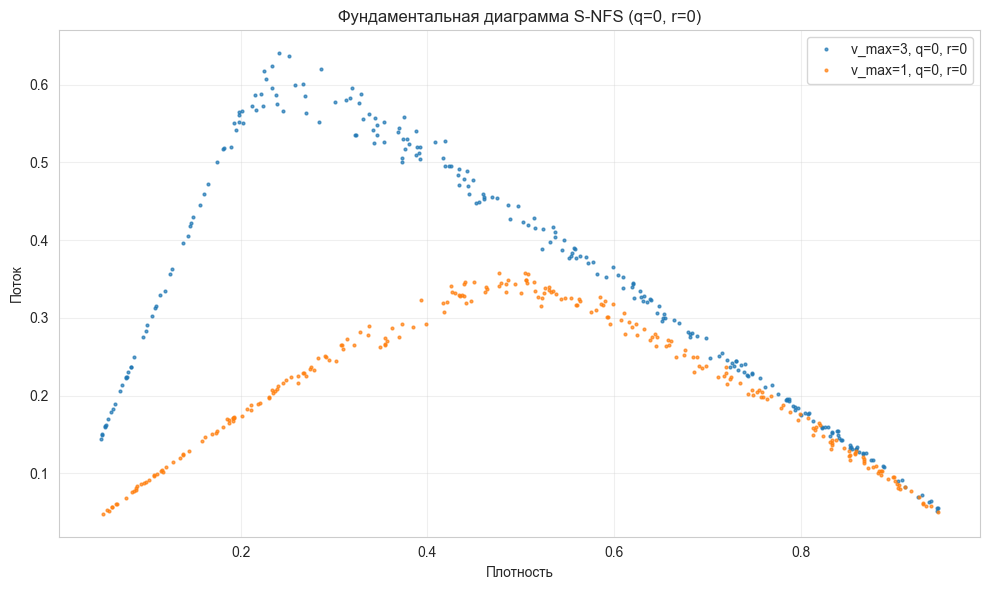

In [17]:
plt.figure(figsize=(10, 6))

print("Вычисление для v_max=3, q=0, r=0...")
densities1, flows1 = simulate_snfs_fundamental_diagram(v_max=3, q=0, r=0)
plt.plot(densities1, flows1, 'o', markersize=2, alpha=0.7, label='v_max=3, q=0, r=0')

print("Вычисление для v_max=1, q=0, r=0...")
densities2, flows2 = simulate_snfs_fundamental_diagram(v_max=1, q=0, r=0, uniform_init=True)
plt.plot(densities2, flows2, 'o', markersize=2, alpha=0.7, label='v_max=1, q=0, r=0')

plt.xlabel('Плотность')
plt.ylabel('Поток')
plt.title('Фундаментальная диаграмма S-NFS (q=0, r=0)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Вычисление для v_max=3, q=0.5, r=0...
Вычисление для v_max=1, q=0.5, r=0...


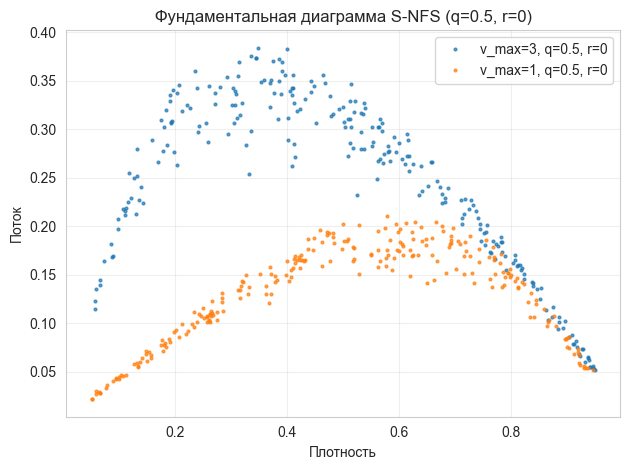

In [18]:
print("Вычисление для v_max=3, q=0.5, r=0...")
densities3, flows3 = simulate_snfs_fundamental_diagram(v_max=3, q=0.5, r=0)
plt.plot(densities3, flows3, 'o', markersize=2, alpha=0.7, label='v_max=3, q=0.5, r=0')

print("Вычисление для v_max=1, q=0.5, r=0...")
densities4, flows4 = simulate_snfs_fundamental_diagram(v_max=1, q=0.5, r=0, uniform_init=True)
plt.plot(densities4, flows4, 'o', markersize=2, alpha=0.7, label='v_max=1, q=0.5, r=0')

plt.xlabel('Плотность')
plt.ylabel('Поток')
plt.title('Фундаментальная диаграмма S-NFS (q=0.5, r=0)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Вычисление для v_max=3, q=1, r=1...
Вычисление для v_max=1, q=1, r=1...


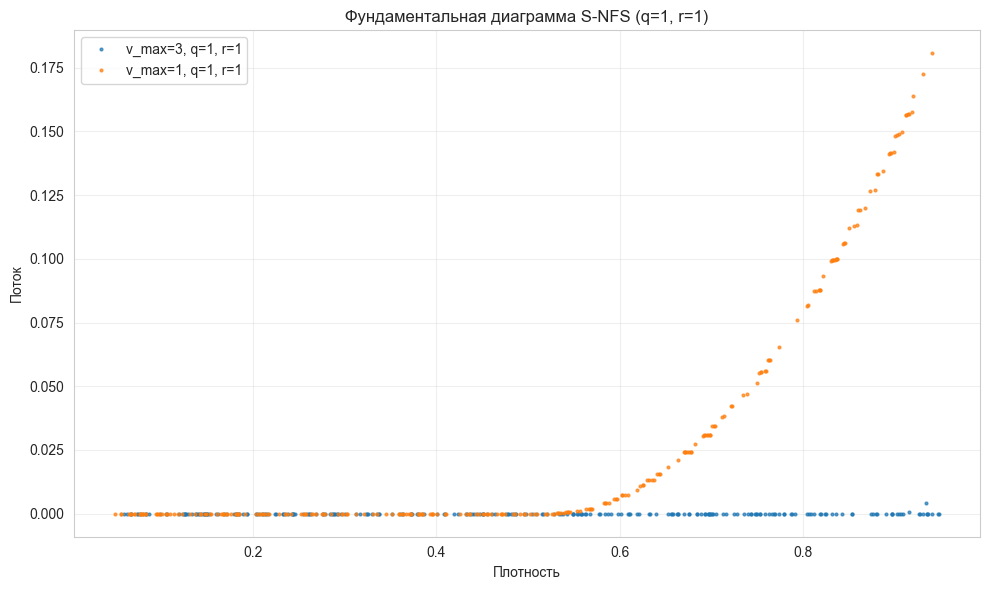

In [19]:
plt.figure(figsize=(10, 6))

print("Вычисление для v_max=3, q=1, r=1...")
densities5, flows5 = simulate_snfs_fundamental_diagram(v_max=3, q=1, r=1)
plt.plot(densities5, flows5, 'o', markersize=2, alpha=0.7, label='v_max=3, q=1, r=1')

print("Вычисление для v_max=1, q=1, r=1...")
densities6, flows6 = simulate_snfs_fundamental_diagram(v_max=1, q=1, r=1, uniform_init=True)
plt.plot(densities6, flows6, 'o', markersize=2, alpha=0.7, label='v_max=1, q=1, r=1')

plt.xlabel('Плотность')
plt.ylabel('Поток')
plt.title('Фундаментальная диаграмма S-NFS (q=1, r=1)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
def xt_diagram_snfs(num_cells=100, num_cars=10, n_steps=50, v_max=3, p=0.1, q=0, r=0):
    road = np.zeros(num_cells, dtype=int)
    car_positions = np.random.choice(num_cells, num_cars, replace=False)
    road[car_positions] = 1

    v = np.random.randint(0, v_max + 1, size=num_cells)
    v[road == 0] = 0

    timeline = np.zeros((n_steps, num_cells), dtype=int)
    for step in range(n_steps):
        timeline[step] = road  # Сохраняем позиции машин
        road, v = update_snfs(road, v, v_max, p, q, r)

    return timeline

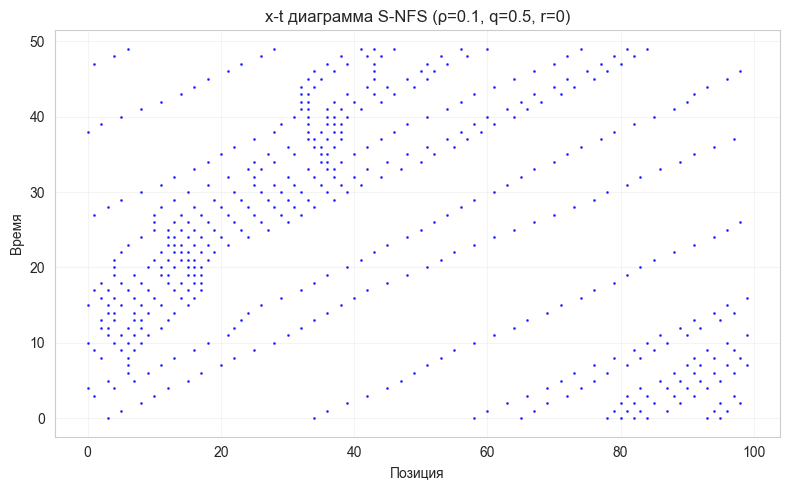

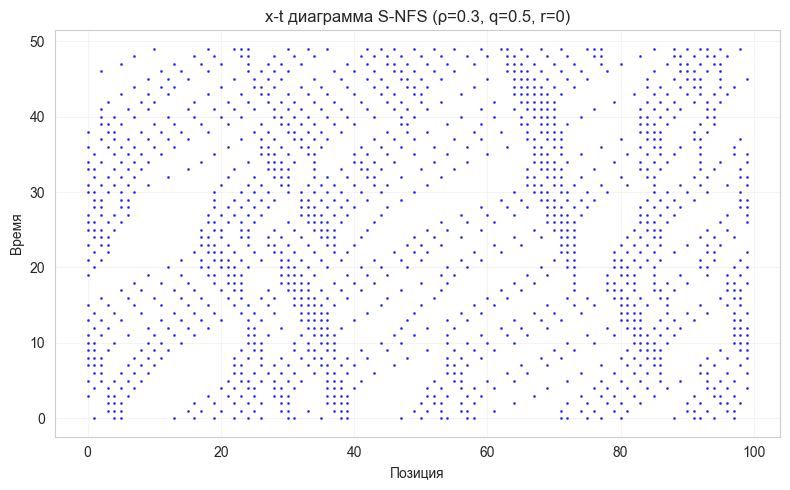

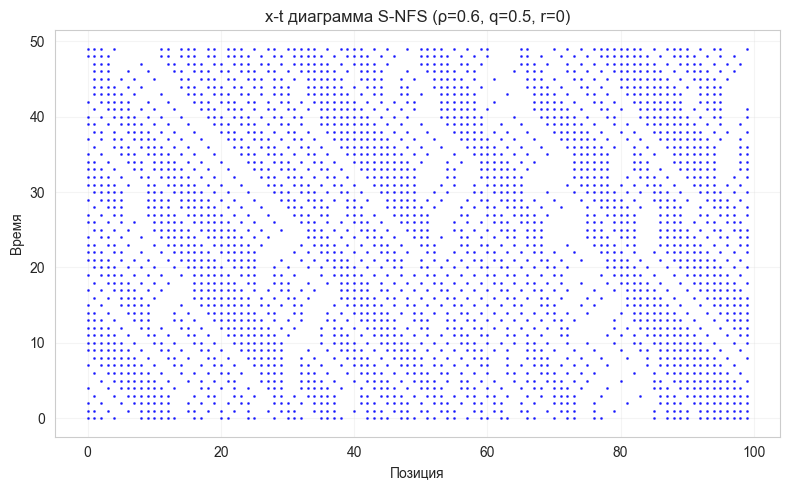

In [21]:
test_densities = [0.1, 0.3, 0.6]
for density in test_densities:
    num_cars = int(100 * density)
    data = xt_diagram_snfs(num_cells=100, num_cars=num_cars, n_steps=50,
                          v_max=3, p=0.1, q=0.5, r=0)

    plt.figure(figsize=(8, 5))
    time_steps, positions = np.where(data > 0)

    plt.scatter(positions, time_steps, s=1, color='blue', alpha=0.7)
    plt.xlabel('Позиция')
    plt.ylabel('Время')
    plt.title(f'x-t диаграмма S-NFS (ρ={density}, q=0.5, r=0)')
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()